In [5]:
# imports general modules, runs ipython magic commands
# change path in this notebook to point to repo locally
# n.b. sometimes need to run this cell twice to init the plotting paramters
import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils/')
import alloptical_utils_pj as ao
import numpy as np
import utils_funcs as uf
import matplotlib.pyplot as plt
%run ./setup_notebook.ipynb
print(sys.path)
import funcs_pj as pjf

plt.rcParams['figure.figsize'] = [20.0, 3.0]

ERROR:root:File `'./setup_notebook.ipynb.py'` not found.


['/home/pshah/Documents/code/Vape/jupyter/Prajay', '/Applications/NEURON-7.6/nrn/lib/python', '/home/pshah/Documents/code/Vape/jupyter/Prajay', '/home/pshah/anaconda3/lib/python37.zip', '/home/pshah/anaconda3/lib/python3.7', '/home/pshah/anaconda3/lib/python3.7/lib-dynload', '', '/home/pshah/anaconda3/lib/python3.7/site-packages', '/home/pshah/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/pshah/.ipython', '/home/pshah/Documents/code/Vape/utils/', '/home/pshah/Documents/code/Vape/', '/home/pshah/Documents/code/Vape/utils/']


In [6]:
# tiffs to run s2p on
to_suite2p = ['t-005']

to_suite2p_tiffs = []
for i in to_suite2p:
    to_suite2p_tiffs.append('/home/pshah/mnt/qnap/Data/2020-03-03/2020-03-03_%s/2020-03-03_%s_Cycle00001_Ch3.tif' % (i,i))

In [13]:
import os

data_path = os.path.expanduser('/home/pshah/mnt/qnap/Data/2020-03-03/')
tiff_list = to_suite2p_tiffs

# setup settings and run suite2p
from suite2p.run_s2p import run_s2p

ops = {
        'batch_size': 2000, # reduce if running out of RAM
        'fast_disk': os.path.expanduser('~/Documents/suite2p_binaries'), # used to store temporary binary file, defaults to save_path0 (set as a string NOT a list)
         #'save_path0': '/media/jamesrowland/DATA/plab/suite_2p', # stores results, defaults to first item in data_path
        'delete_bin': True, # whether to delete binary file after processing
        # main settings
        'nplanes' : 1, # each tiff has these many planes in sequence
        'nchannels' : 1, # each tiff has these many channels per plane
        'functional_chan' : 1, # this channel is used to extract functional ROIs (1-based)
        'diameter': 8, # this is the main parameter for cell detection, 2-dimensional if Y and X are different (e.g. [6 12])
        'tau':  1.26, # this is the main parameter for deconvolution (1.25-1.5 for gcamp6s)
        'fs': 15.,  # sampling rate (total across planes)
        # output settings
        'save_mat': True, # whether to save output as matlab files
        'combined': True, # combine multiple planes into a single result /single canvas for GUI
        # parallel settings
        'num_workers': 50, # 0 to select num_cores, -1 to disable parallelism, N to enforce value
        'num_workers_roi': 0, # 0 to select number of planes, -1 to disable parallelism, N to enforce value
        # registration settings
        'do_registration': True, # whether to register data
        'nimg_init': 200, # subsampled frames for finding reference image
        'maxregshift': 0.1, # max allowed registration shift, as a fraction of frame max(width and height)
        'align_by_chan' : 1, # when multi-channel, you can align by non-functional channel (1-based)
        'reg_tif': False, # whether to save registered tiffs
        'subpixel' : 10, # precision of subpixel registration (1/subpixel steps)
        # cell detection settings
        'connected': True, # whether or not to keep ROIs fully connected (set to 0 for dendrites)
        'navg_frames_svd': 5000, # max number of binned frames for the SVD
        'nsvd_for_roi': 1000, # max number of SVD components to keep for ROI detection
        'max_iterations': 20, # maximum number of iterations to do cell detection
        'ratio_neuropil': 6., # ratio between neuropil basis size and cell radius
        'ratio_neuropil_to_cell': 3, # minimum ratio between neuropil radius and cell radius
        'tile_factor': 1., # use finer (>1) or coarser (<1) tiles for neuropil estimation during cell detection
        'threshold_scaling': 1., # adjust the automatically determined threshold by this scalar multiplier
        'max_overlap': 0.75, # cells with more overlap than this get removed during triage, before refinement
        'inner_neuropil_radius': 2, # number of pixels to keep between ROI and neuropil donut
        'outer_neuropil_radius': np.inf, # maximum neuropil radius
        'min_neuropil_pixels': 350, # minimum number of pixels in the neuropil
        # deconvolution settings
        'baseline': 'maximin', # baselining mode
        'win_baseline': 60., # window for maximin
        'sig_baseline': 10., # smoothing constant for gaussian filter
        'prctile_baseline': 8.,# optional (whether to use a percentile baseline)
        'neucoeff': .7,  # neuropil coefficient
      }

# make the local suite2p binaries file if it does not already exist
if not os.path.exists(ops['fast_disk']):
    os.mkdir(ops['fast_disk'])
    
# name of the folder to save results in (default = suite2p in data_path)
save_folder = os.path.join('/home/pshah/mnt/qnap/Data/2020-03-03/', 'suite2p/spont-4ap-08x')  


diameter = 8  # the average diameter (in pixels) of a cell -- check in fiji
fs = 15  # sampling rate of imaging (default 30 fps)
nplanes = 1  # number of planes (default 1)
nchannels = 1 # number of channels aquired (default 1)  

db = {
     'data_path': data_path,
     'tiff_list': tiff_list, 
     'diameter': diameter, 
     'fs': fs,
     'nplanes': nplanes,
     'nchannels': nchannels,
     'save_folder': save_folder
     }

In [14]:
import time as time
# run suite2p
t1 = time.time()
opsEnd=run_s2p(ops=ops,db=db)
t2 = time.time()
print('Total time this cell was running is {}'.format(t2-t1))

{'data_path': '/home/pshah/mnt/qnap/Data/2020-03-03/', 'tiff_list': ['/home/pshah/mnt/qnap/Data/2020-03-03/2020-03-03_t-005/2020-03-03_t-005_Cycle00001_Ch3.tif'], 'diameter': 8, 'fs': 15, 'nplanes': 1, 'nchannels': 1, 'save_folder': '/home/pshah/mnt/qnap/Data/2020-03-03/suite2p/spont-4ap-08x'}
tif
** Found 1 tifs - converting to binary **
time 478.14 sec. Wrote tifs to binaries for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
----------- REGISTRATION
registering 3005 frames
Reference frame, 16.74 sec.
3005/3005 frames, 816.49 sec.
bad frames file path: /bad_frames.npy
----------- Total 834.67 sec
Registration metrics, 89.68 sec.
----------- ROI DETECTION AND EXTRACTION
Binning movie in chunks of length 19
Binned movie [158,1021,1021], 8.47 sec.
NOTE: estimated spatial scale ~6 pixels, time epochs 1.00, threshold 5.00 
0 ROIs, score=59.03
1000 ROIs, score=5.81
2000 ROIs, score=5.39
3000 ROIs, score=5.19
4000 ROIs, score=5.05
Found 4423 ROIs, 43.03 sec
NOTE: applying cla

/home/pshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


After removing overlaps, 4195 ROIs remain
Masks made in 53.94 sec.
Extracted fluorescence from 4195 ROIs in 3005 frames, 41.50 sec.
----------- Total 164.69 sec.
----------- SPIKE DECONVOLUTION
----------- Total 155.47 sec.
Plane 0 processed in 1250.73 sec (can open in GUI).
total = 416.06 sec.
TOTAL RUNTIME 419.17 sec
Total time this cell was running is 1732.0329678058624


In [ ]:
import time as time
# run suite2p
t1 = time.time()
opsEnd=run_s2p(ops=ops,db=db)
t2 = time.time()
print('Total time this cell was running is {}'.format(t2-t1))

#### Exp: after 4AP - classic_naparm_001 - trial 1/3

In [ ]:
paths = []
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012'
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012/2020-03-04_t-012_Cycle00001_Ch3.tif'
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_classic_naparm_001'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012.paq'

paths.append([tiffs_loc, naparms_loc, paqs_loc])
paths

In [ ]:
exp_obj = ao.alloptical(paths[0], stim='2pstim')
for key, values in vars(exp_obj).items():
    print(key)

exp_obj._parseNAPARMgpl()
exp_obj._parseNAPARMxml()
exp_obj._parsePVMetadata()
exp_obj.stimProcessing(stim_channel='markpoints2packio')

In [40]:
photostim_frames = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        photostim_frames.append(j+i)

np.save('%s/bad_frames.npy' % tiffs_loc, photostim_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

print('/// New frame total:', exp_obj.n_frames-len(photostim_frames), 'frames ///')


/// New frame total: 1619 frames ///


In [41]:
### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
tiff_path = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012/2020-03-04_t-012_Cycle00001_Ch3.tif'

import tifffile as tf
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))


frames_to_whiten = []
for j in exp_obj.stim_start_frames[0]:
        frames_to_whiten.append(j)

im_stack_1 = im_stack
a = np.full_like(im_stack_1[0], fill_value=0)
a[0:100,0:100] = 5000.
for frame in frames_to_whiten:
    im_stack_1[frame-3] = im_stack_1[frame-3]+a
    im_stack_1[frame-2] = im_stack_1[frame-2]+a
    im_stack_1[frame-1] = im_stack_1[frame-1]+a    
    
frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

im_stack_1 = np.delete(im_stack, frames_to_remove, axis=0)

tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012/2020-03-04_t012_artifactrem2.tif",
           im_stack_1, photometric='minisblack')

# # find the frames which are now photostim frames (relative to the new length after frames removed)
# new_tiff = "/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-012/2020-03-04_t012_artifactrem2.tif"
# new_stack = tf.imread(new_tiff, key=(range(len(im_stack_1))))

# new_photostim_frames = []
# for i in range(len(new_stack)):
#     if new_stack[i][0][0]==1001:
#         new_photostim_frames.append(i)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-009/2020-03-04_t-012_Cycle00001_Ch3.tif'

#### Exp: smash_11 trials

In [20]:
trial = 't-009'

paths = []
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_%s' % trial
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_%s/2020-03-04_%s_Cycle00001_Ch3.tif' % (trial, trial)
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_smash_011'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_%s.paq' % trial

paths.append([tiffs_loc, naparms_loc, paqs_loc])
paths

[['/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-009',
  '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_smash_011',
  '/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_t-009.paq']]

n planes: 1 
n frames: 3801 
fps: 15.224634920866917 
frame size (px): 1024 x 1024 
zoom: 0.795378456 
pixel size (um): 1.37329894729094 1.37329894729094 
scan centre (V): 0.0 0.0
tiff_path
naparm_path
paq_path
fps
frame_x
frame_y
n_planes
pix_sz_x
pix_sz_y
scan_x
scan_y
zoom
n_frames
stim_type
['/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_smash_011/2020-03-04_smash_011.gpl']
/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_smash_011/2020-03-04_smash_011.gpl
Single stim dur (ms): 10
Spiral size (um): 0.047535
['/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_smash_011/2020-03-04_smash_011.xml']
/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_smash_011/2020-03-04_smash_011.xml
Numbers of trials: 10 
Number of groups: 2 
Number of shots: 1 
Number of sequence reps: 67 
Inter-group delay: 5
n planes: 1 
n frames: 3801 
fps: 15.224634920866917 
frame size (px): 1024 x 1024 
zoom: 0.795378456 
pixel size (um): 1.37329894729094 1.37329894729094 
scan centre (V): 0.0 0.0
['/home/pshah/mnt/

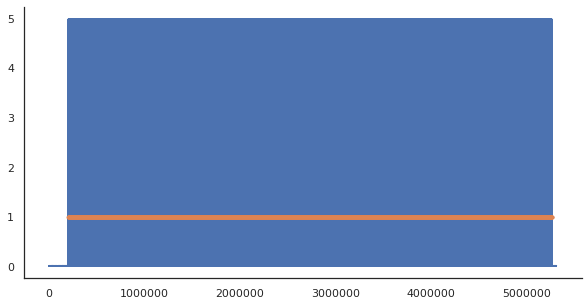

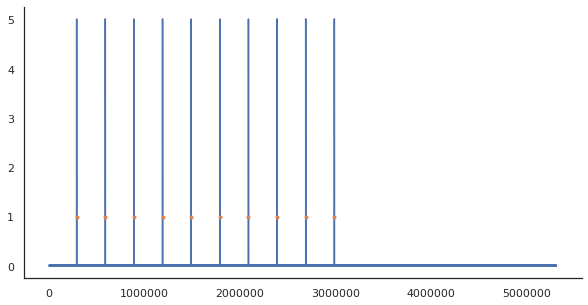

In [21]:
exp_obj = ao.alloptical(paths[0], stim='2pstim')
for key, values in vars(exp_obj).items():
    print(key)

exp_obj._parseNAPARMgpl()
exp_obj._parseNAPARMxml()
exp_obj._parsePVMetadata()
exp_obj.stimProcessing(stim_channel='markpoints2packio')

In [22]:
photostim_frames = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        photostim_frames.append(j+i)

np.save('%s/bad_frames.npy' % tiffs_loc, photostim_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

print('/// New frame total:', exp_obj.n_frames-len(photostim_frames), 'frames ///')


/// New frame total: 3481 frames ///


In [23]:
### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
import tifffile as tf

tiff_path = tiffs_loc2

im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))


frames_to_whiten = []
for j in exp_obj.stim_start_frames[0]:
        frames_to_whiten.append(j)

im_stack_1 = im_stack
a = np.full_like(im_stack_1[0], fill_value=0)
a[0:100,0:100] = 5000.
for frame in frames_to_whiten:
    im_stack_1[frame-3] = im_stack_1[frame-3]+a
    im_stack_1[frame-2] = im_stack_1[frame-2]+a
    im_stack_1[frame-1] = im_stack_1[frame-1]+a    
    
frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

im_stack_1 = np.delete(im_stack, frames_to_remove, axis=0)

tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_%s/2020-03-04_%s_artifactrem.tif" % (trial, trial),
           im_stack_1, photometric='minisblack')

# find the frames which are now photostim frames (relative to the new length after frames removed)
new_tiff = "/home/pshah/mnt/qnap/Data/2020-03-04/2020-03-04_%s/2020-03-04_%s_artifactrem.tif" % (trial, trial)
new_stack = tf.imread(new_tiff, key=(range(len(im_stack_1))))

new_photostim_frames = []
for i in range(len(new_stack)):
    if new_stack[i][0][0]==1001:
        new_photostim_frames.append(i)